In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Pipeline

In [121]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [122]:
Data.drop(index = Data[Data.Sex == 'unknown'].index, inplace=True)
#median_age = Data['Age'].median()
#Data['Age'].fillna(median_age, inplace=True)

In [123]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
Data['Age'] = imp.fit_transform(Data[['Age']])

In [124]:
Data.dropna(subset = ['Embarked'], inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  884 non-null    int64  
 1   Survived     884 non-null    int64  
 2   Pclass       884 non-null    int64  
 3   Name         884 non-null    object 
 4   Sex          884 non-null    object 
 5   Age          884 non-null    float64
 6   SibSp        884 non-null    int64  
 7   Parch        884 non-null    int64  
 8   Ticket       884 non-null    object 
 9   Fare         884 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     884 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 89.8+ KB


In [125]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
y = Data['Survived']
X = Data.drop(columns = ['PassengerId','Survived','Name','Ticket','Cabin'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Split Data

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [128]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X,y):
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

In [129]:
list(sss.split(X,y))

[(array([ 91,  49, 370, 154, 598, 561, 269, 247, 599, 190, 825, 392, 446,
         413, 802, 660, 404,  67, 790, 327, 474, 490, 820, 252, 816, 487,
         771, 292, 830,  55, 127, 584, 807, 574,   9, 276,  62, 804, 121,
         847, 871, 295,  35,  92, 496,  45, 301, 735, 339, 305, 686, 333,
          63, 854, 405,  96, 547, 440, 118, 192, 169, 349, 250, 505, 152,
         254, 352, 157, 713,  56, 296, 840, 216, 129, 637, 671, 497, 388,
         632, 137, 824, 702, 738, 238, 698, 672, 402, 701, 407,  54, 522,
         679, 628, 535, 570, 832, 770, 422, 668, 104, 142, 311,  37, 143,
         200, 420, 841, 761, 502, 133, 670,  28, 756,  60, 234, 711, 796,
         688, 485, 736,   4, 102, 334,  16,  25, 208, 167, 508, 307, 386,
         481, 597, 281, 181,  68, 618, 434, 612, 728,  85, 580, 590, 362,
         271, 114, 377, 344, 130, 784, 783, 239, 185,   2, 749, 617, 527,
         583, 261, 815, 755, 758, 431, 182, 469, 881, 316, 557, 492,  14,
          20, 156, 410, 674, 605,  10,

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [131]:
transform1 = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['Sex','Embarked']), ('Scaler', StandardScaler(), ['Pclass',	'SibSp',	'Parch',	'Fare'])])

In [132]:
transform1.fit_transform(X_train)[0,:]

array([ 1.        ,  0.        ,  0.        , -1.57579141, -0.47053958,
        0.75102542,  0.60678716])

In [133]:
transform1.fit_transform(X_train).shape

(707, 7)

In [134]:
transform1.transform(X_test)[0,:]

array([ 1.        ,  0.        ,  1.        ,  0.8200893 , -0.47053958,
       -0.46402028, -0.47611551])

In [135]:
pipe1 = Pipeline([('transform', transform1), ('classifier', LogisticRegression())])

In [136]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('Scaler', StandardScaler(),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('classifier', LogisticRegression())])

In [137]:
pipe1.score(X_test, y_test)

0.8022598870056498

In [138]:
transform2 = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['Sex','Embarked'])], remainder='passthrough')

In [139]:
transform2.fit_transform(X_train)[0,:]

array([ 1.    ,  0.    ,  0.    ,  1.    , 23.    ,  0.    ,  1.    ,
       63.3583])

In [140]:
pipe2 = Pipeline([('transform', transform2), ('scaler', StandardScaler()), ('classifier', LogisticRegression())])

In [141]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked'])])),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [142]:
pipe2.score(X_test, y_test)

0.8022598870056498

# Feature Engineering

In [143]:
Data_new = X.copy()
#Data_new['y'] = y
Data_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Correlation 

In [144]:
Data_new.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.330192,0.081720,0.013969,-0.548094
Age,-0.330192,1.000000,-0.233913,-0.183016,0.088378
SibSp,0.081720,-0.233913,1.000000,0.421809,0.160630
Parch,0.013969,-0.183016,0.421809,1.000000,0.221926
Fare,-0.548094,0.088378,0.160630,0.221926,1.000000


In [145]:
dummies = pd.get_dummies(Data_new['Embarked'], drop_first=True)
Data_new.drop('Embarked', axis=1, inplace=True)
Data_new = pd.concat((Data_new, dummies), axis=1)
Data_new['Sex'] = pd.get_dummies(Data_new['Sex'], drop_first=True)
Data_new['y'] = y
Data_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,y
0,3,1,22.0,1,0,7.2500,0,1,0
1,1,0,38.0,1,0,71.2833,0,0,1
2,3,0,26.0,0,0,7.9250,0,1,1
3,1,0,35.0,1,0,53.1000,0,1,1
4,3,1,35.0,0,0,8.0500,0,1,0


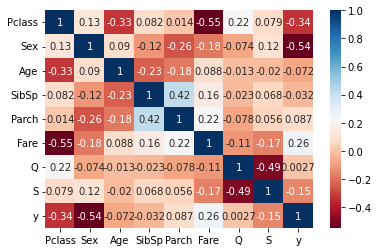

In [146]:
sns.heatmap(Data_new.corr(), cmap="RdBu", annot=True)

## Data Binning

In [147]:
#pd.cut(Data_new['Age'].astype(int), 5)
pd.qcut(Data_new['Age'], 5)

0        (20.3, 28.0]
1      (29.743, 38.0]
2        (20.3, 28.0]
3      (29.743, 38.0]
4      (29.743, 38.0]
            ...      
886      (20.3, 28.0]
887     (0.419, 20.3]
888    (28.0, 29.743]
889      (20.3, 28.0]
890    (29.743, 38.0]
Name: Age, Length: 884, dtype: category
Categories (5, interval[float64, right]): [(0.419, 20.3] < (20.3, 28.0] < (28.0, 29.743] <
                                           (29.743, 38.0] < (38.0, 80.0]]

In [148]:
orde = OrdinalEncoder()
Data_new['Age'] = pd.cut(Data_new['Age'].astype(int), 5).to_numpy()
Data_new['Age'] = orde.fit_transform(Data_new[['Age']])

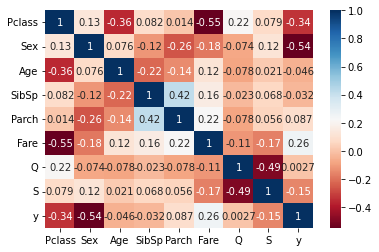

In [149]:
sns.heatmap(Data_new.corr(), cmap="RdBu", annot=True)

In [150]:
from sklearn.preprocessing import KBinsDiscretizer

In [151]:
bin = KBinsDiscretizer(n_bins=5, encode='ordinal')

In [152]:
bin.fit_transform(Data[['Age']])

array([[1.],
       [4.],
       [1.],
       [3.],
       [3.],
       [4.],
       [0.],
       [1.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [4.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [0.],
       [2.],
       [0.],
       [4.],
       [3.],
       [0.],
       [3.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [1.],
       [0.],
       [0.],
       [4.],
       [1.],
       [3.],
       [0.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [0.],
       [1.],
       [4.],
       [2.],
       [4.],
       [3.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [4.],
       [0.],
       [3.],
       [3.],
       [2.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [2.],
       [3.],

In [153]:
bin.transform([[240]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KBinsDiscretizer was fitted with feature names
  "X does not have valid feature names, but"


array([[4.]])

In [154]:
bin.bin_edges_

array([array([ 0.42      , 20.3       , 28.        , 29.74309423, 38.        ,
       80.        ])], dtype=object)

In [155]:
transform3 = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['Sex','Embarked']), ('bin', KBinsDiscretizer(n_bins=5, encode='ordinal'), ['Age'])], remainder='passthrough')

In [156]:
transform3.fit_transform(X_train)[0,:]

array([ 1.    ,  0.    ,  0.    ,  1.    ,  1.    ,  0.    ,  1.    ,
       63.3583])

In [157]:
pipe3 = Pipeline([('transform', transform3), ('scaler', StandardScaler()), ('classifier', LogisticRegression())])

In [158]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('bin',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['Age'])])),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [159]:
pipe3.score(X_test, y_test)

0.8135593220338984

# Pairwise plot

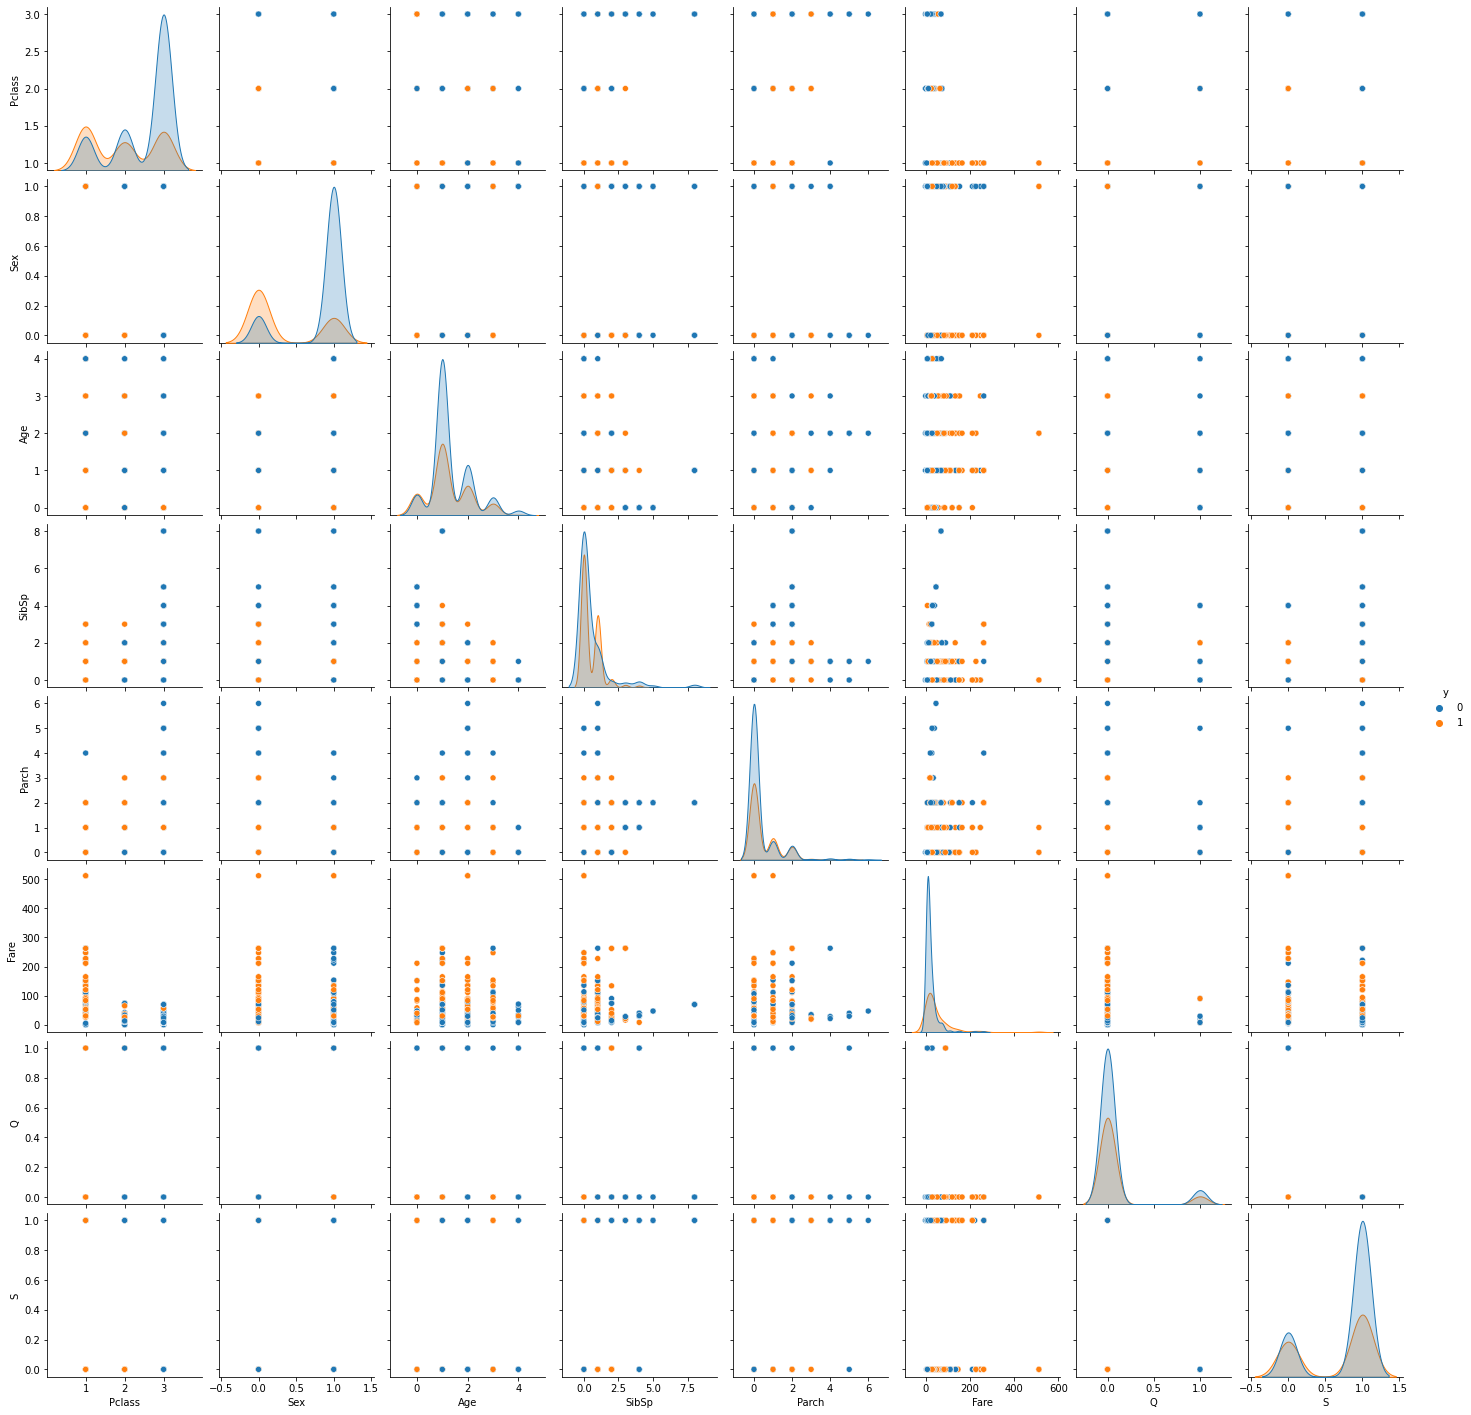

In [85]:
#Data_new['Age'] = Data['Age']
#sns.pairplot(Data_new)
sns.pairplot(Data_new, hue='y')

## Add nonlinear features

In [160]:
from sklearn.preprocessing import PolynomialFeatures
#pf = PolynomialFeatures(2)
pf = PolynomialFeatures((2,2), include_bias=False)
pf.fit_transform(Data_new[['Age']])

array([[ 1.],
       [ 4.],
       [ 1.],
       [ 4.],
       [ 4.],
       [ 9.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 9.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 4.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 4.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 4.],
       [ 1.],
       [ 1.],
       [16.],
       [ 1.],
       [ 4.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 4.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 9.],
       [ 1.],
       [16.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 4.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [161]:
class my_transform:
  def fit(self, X, y=None, sample_weight=None):
    self.col = 3
    return self

  def transform(self, X, y=None, sample_weight=None):
    return np.hstack((X, X[:,self.col].reshape(-1,1)**(2)))

  def __str__(self):
    return "my_transform()"

  def __repr__(self):
    return "my_transform()"

In [162]:
my = my_transform()

In [163]:
my.fit(transform4.fit_transform(X_train, y_train))

my_transform()

In [164]:
my.transform(transform4.fit_transform(X_train, y_train))

array([[ 1.    ,  0.    ,  0.    , ...,  1.    , 63.3583,  1.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    , 26.    ,  4.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  7.25  ,  1.    ],
       ...,
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  7.05  ,  1.    ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    , 29.7   ,  9.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  8.05  ,  9.    ]])

In [165]:
transform4 = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['Sex','Embarked']), ('bin', KBinsDiscretizer(n_bins=5, encode='ordinal'), ['Age'])], remainder='passthrough')

In [166]:
pipe4 = Pipeline([('transform', transform3), ('my_transformer', my_transform()), ('scaler', StandardScaler()), ('classifier', LogisticRegression())])

In [167]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('bin',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['Age'])])),
                ('my_transformer', my_transform()),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [168]:
pipe4.score(X_test, y_test)

0.807909604519774